<a href="https://colab.research.google.com/github/maxzameer/Brainstorm/blob/main/example/audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np


In [3]:
file = '/content/blues.00000.wav'

In [4]:
signal , sr = librosa.load(file,sr=22050)

In [18]:
len(signal)

661794

In [11]:
sr

22050

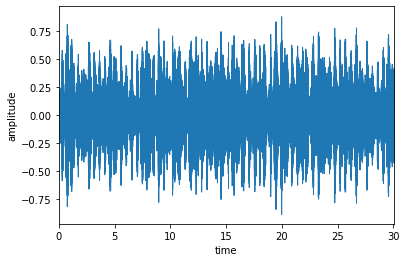

In [16]:
librosa.display.waveplot(signal,sr=sr)
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()

In [20]:
fft = np.fft.fft(signal)

In [21]:
fft

array([-39.49905396-7.46069873e-14j, -18.64591868+3.67946888e-01j,
       -18.55041851+7.65147152e-02j, ..., -18.52902335+3.12934891e-02j,
       -18.55041851-7.65147152e-02j, -18.64591868-3.67946888e-01j])

In [24]:
magnitude = np.abs(fft)

In [25]:
magnitude

array([39.49905396, 18.64954874, 18.55057631, ..., 18.52904978,
       18.55057631, 18.64954874])

In [26]:
frequency = np.linspace(0,sr,len(magnitude))

In [27]:
frequency

array([0.00000000e+00, 3.33185754e-02, 6.66371509e-02, ...,
       2.20499334e+04, 2.20499667e+04, 2.20500000e+04])

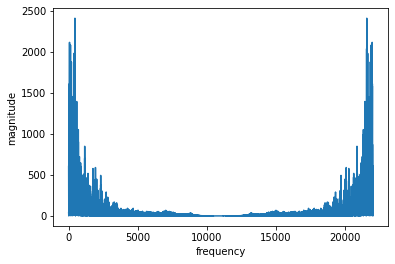

In [30]:
plt.plot(frequency,magnitude)
plt.xlabel('frequency')
plt.ylabel('magnitude')
plt.show()

In [31]:
left_frequency  = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]

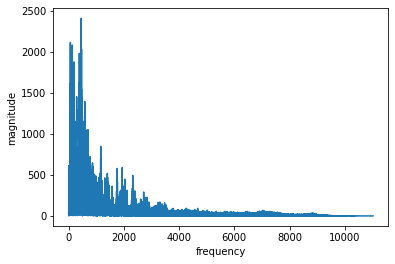

In [32]:
plt.plot(left_frequency,left_magnitude)
plt.xlabel('frequency')
plt.ylabel('magnitude')
plt.show()

In [33]:
right_frequency  = frequency[int(len(frequency)/2):]
right_magnitude = magnitude[int(len(magnitude)/2):]

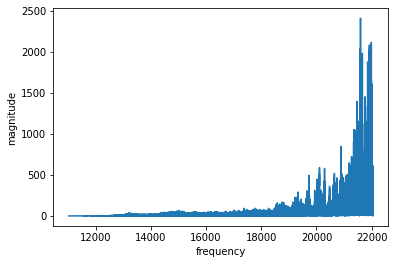

In [34]:
plt.plot(right_frequency,right_magnitude)
plt.xlabel('frequency')
plt.ylabel('magnitude')
plt.show()

In [36]:
# short time fourier transform (ssft)

In [39]:
# number of sample per fft 
n_fft = 2048
hop_length = 512
stft = librosa.core.stft(signal,hop_length=hop_length,n_fft=n_fft)

In [44]:
spectrogram = np.abs(stft)
log_spectrogram= librosa.amplitude_to_db(spectrogram)

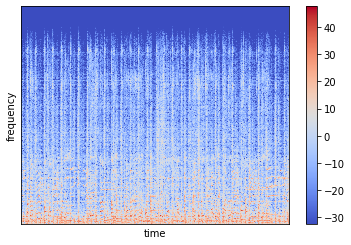

In [45]:
librosa.display.specshow(log_spectrogram,sr=sr,hop_length=hop_length)

plt.xlabel('time')
plt.ylabel('frequency')
plt.colorbar()
plt.show()